In [5]:
pip install --upgrade tensorflow

  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl (390.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers,models


In [12]:
(train_ds,train_labels),(test_ds,test_labels)=tfds.load(
    "tf_flowers",
    split=["train[:70%]","train[:30%]"],
    batch_size=-1,
    as_supervised=True
)

In [13]:
# resize
train_ds=tf.image.resize(train_ds,(150,150))
test_ds=tf.image.resize(test_ds,(150,150))

In [14]:
# transform
train_labels=to_categorical(train_labels,num_classes=5)
test_labels=to_categorical(test_labels,num_classes=5)

In [16]:
# build model
base_model=VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))
base_model.trainable=False

In [17]:
# preprocessinput
train_ds=preprocess_input(train_ds)
test_ds=preprocess_input(test_ds)

In [20]:
# 7model
model=models.Sequential([
 
    base_model,
    layers.Flatten(),
    layers.Dense(50,activation="relu"),
    layers.Dense(20,activation="relu"),
    layers.Dense(5,activation="softmax")
])

In [21]:
# 8 compile
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [22]:
# 9 es
es=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [25]:
# 10
h=model.fit(train_ds,train_labels,validation_split=0.2,epochs=10,batch_size=32,callbacks=[es])

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.3224 - loss: 2.2682 - val_accuracy: 0.5039 - val_loss: 1.3219
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.5793 - loss: 1.0956 - val_accuracy: 0.6342 - val_loss: 1.0329
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7086 - loss: 0.7088 - val_accuracy: 0.6206 - val_loss: 1.1225
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7643 - loss: 0.5557 - val_accuracy: 0.6498 - val_loss: 1.0658
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7960 - loss: 0.4470 - val_accuracy: 0.6654 - val_loss: 1.1210
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.8311 - loss: 0.4237 - val_accuracy: 0.6654 - val_loss: 0.9738
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.8660 - loss: 0.3390 - val_accuracy: 0.6926 - val_loss: 1.0021
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.8991 - loss: 0.2426 - val_accuracy: 0.6868 - val_loss:

In [26]:
#11
model.evaluate(test_ds,test_labels)

35/35 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8461 - loss: 0.3421


[0.32577139139175415, 0.8601271510124207]

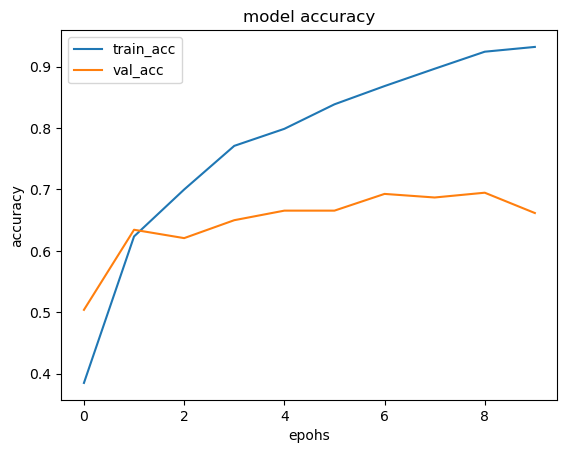

In [35]:
#12
plt.plot(h.history['accuracy'],label='train_acc')
plt.plot(h.history['val_accuracy'],label='val_acc')
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epohs')
plt.legend(loc='upper left')
plt.show()

# plt.plot(h.history['accuracy'],label='train_acc')
# plt.plot(h.history['val_accuracy'],label='val_acc')
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epochs')
# plt.legend(loc='upper left')
# plt.show()

In [36]:
#13
flower_classes=["dendelion","daisy","tulips","sunflowers","roses"]

In [37]:
sample_classes=5
indices=random.sample(range(len(test_ds)),sample_classes)

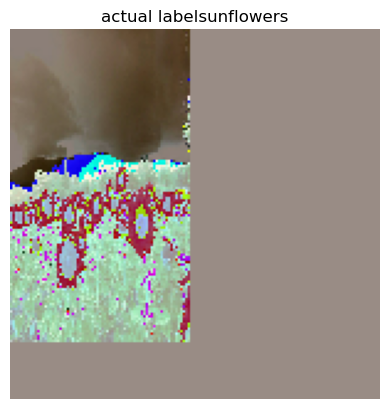

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
probablities class
dendelion:0.004735213238745928
daisy:1.408480557074654e-06
tulips:0.008850674144923687
sunflowers:0.9837948083877563
roses:0.0026178655680269003
the predited lable isunflowers


NameError: name 'flower' is not defined

In [40]:
for idx in indices:
    test_image=test_ds[idx].numpy()
    test_label=test_labels[idx]
    
    plt.imshow(test_image.astype('uint8'))
    plt.title("actual label"+flower_classes[np.argmax(test_label)])
    plt.axis('off')
    plt.show()
    
    test_image_expand=np.expand_dims(test_image,axis=0)
    y_pred=model.predict(test_image_expand)
    
    print("predict probablitie")
    for i,classes in enumerate(flower_classes):
        print(f"{classes}:{y_pred[0][i]}")
    
    predicted_label=np.argmax(y_pred[0])
    print(f"the predited lable i"+flower_classes[predicted_label])
    
    actual=np.argmax(test_label)
    print("actual label is"+flower-classes[actual])
    
    if predicted_label==actual:
        print("prediction is correct")
    else:
        print("prediction is wrong")